In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")
sys.path.append(r"/ssd_scratch/scripts/sdtools")

from analysis import *
import h2D
import grid_fields

In [2]:

self = h2D.Load.case_2D(r"/ssd_scratch/hcases/t4-allsrc_proper", 
                        gridfilepath = r"/ssd_scratch/hcases/g3a4f3-allflux_proper.nc", unnormalise_geom = False)
# self.diagnose_cvode()

case = self

/ssd_scratch/hcases/g3a4f3-allflux_proper.nc
/ssd_scratch/hcases/t4-allsrc_proper
--> dx, dy and J will not be unnormalised




['dx', 'dy', 'J']
CHECK: Total domain volume is 1.607E+00 [m3]


In [3]:
self.ds["dx"].values.sum()

2.586142943696739

In [3]:
self.normalised_vars

['Td+',
 'Te',
 'Ne',
 'Nd+',
 'Nd',
 'Pe',
 'Pd+',
 'Pd+_src',
 'Pe_src',
 'Sd+_src',
 'Rd+_ex',
 'Sd+_iz',
 'NVd+',
 'NVd']

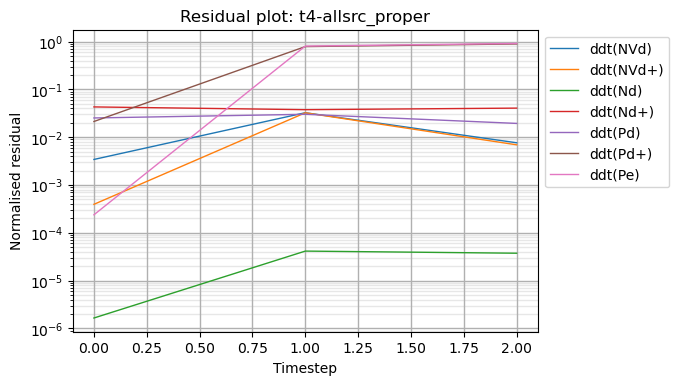

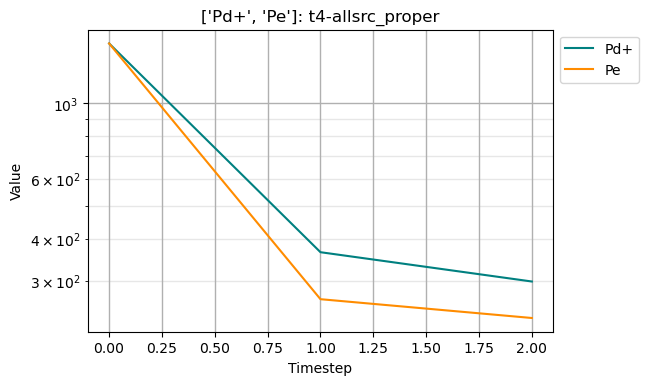

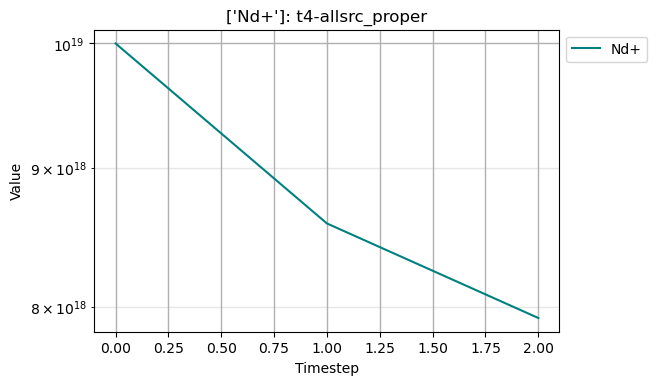

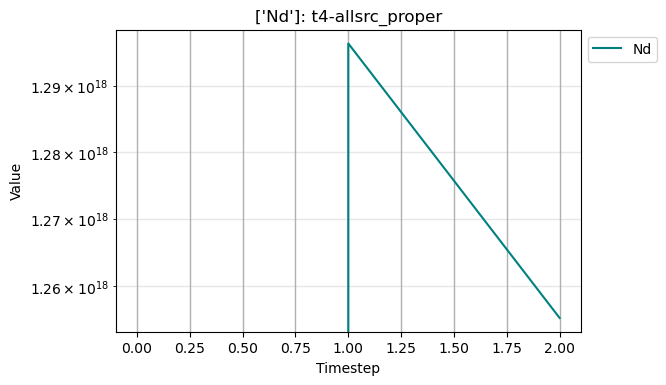

In [4]:
self.plot_ddt(smoothing = 1)
# self.plot_ddt(smoothing = 20)
self.plot_monitors(["Pd+", "Pe"], what = ["mean"])
self.plot_monitors(["Nd+"], what = "mean")
self.plot_monitors(["Nd"], what = "mean")

[(0.0, 0.9), (0.0, 0.9), (0.0, 0.9), (0.0, 0.9)]

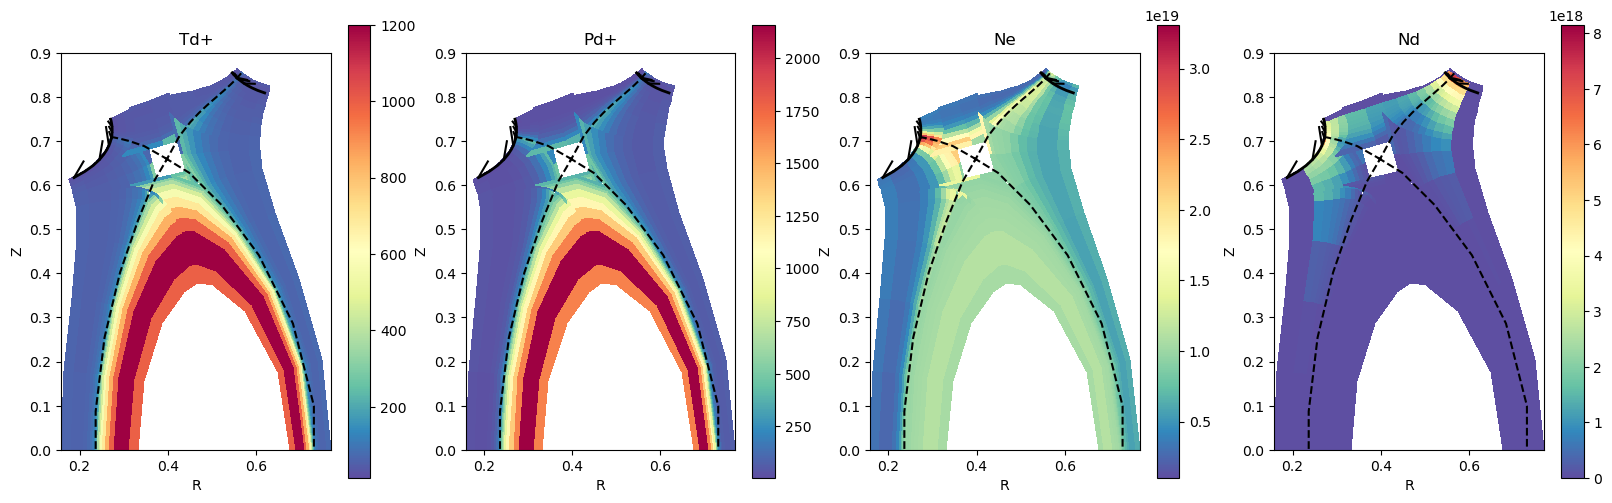

In [9]:
data = case.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*5,6), dpi = 100)

data["Td+"].isel(t=-1).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False,
# vmin = 53, vmax = 1600, 
)
data["Pd+"].isel(t=-1).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False,
# vmin = 2.2, vmax = 1400, 
)
data["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False,
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].isel(t=-1).bout.pcolormesh(ax = axes[3], cmap = "Spectral_r", logscale = False,
# vmin = 9.7e13, vmax = 2.9e19, 
)
# [ax.set_ylim(-0.9,0) for ax in axes]
[ax.set_ylim(0,0.9) for ax in axes]

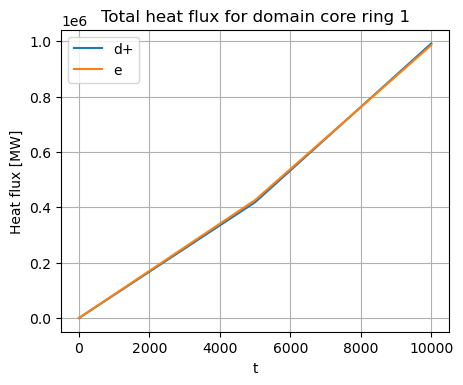

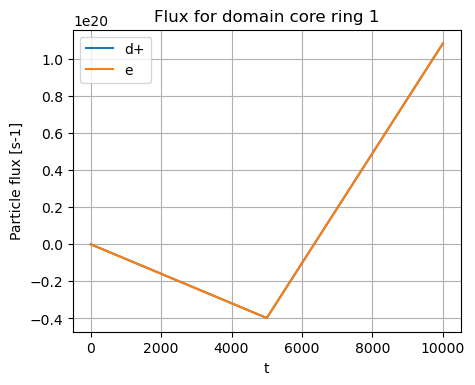

In [8]:
ring = h2D.CoreRing(self, ring_index = 1)
ring.D["d+"] = 1; ring.D["e"] = 1;
ring.Chi["d+"] = 3; ring.Chi["e"] = 3;
ring.calculate_fluxes()
ring.sum_fluxes()
ring.plot_heat_flux_history()
ring.plot_particle_flux_history()

In [3]:
case = self

domain = h2D.Region(case, case.slices("all"))
core_ring = h2D.CoreRing(case, ring_index = 0)

core_i_source = domain.integrals["Pd+_src"] * 1e-6 
core_e_source = domain.integrals["Pe_src"] * 1e-6
rad_iz = domain.integrals["Rd+_ex"] * 1e-6 * -1    # MW
rad_rec = domain.integrals["Rd+_rec"] * 1e-6 * -1  # MW
core_i_power = core_ring.total_heat_flux["d+"].squeeze() * 1e-6    # MW
core_e_power = core_ring.total_heat_flux["e"].squeeze() * 1e-6    # MW


print(f"- Ion power source: {core_i_source[-1]:,.1f}MW")
print(f"- Electron power source: {core_e_source[-1]:,.1f}MW")
print(f"- Ion power leaving core: {core_i_power[-1]:,.1f}MW")
print(f"- Electron power leaving core: {core_e_power[-1]:,.1f}MW")
print(f"- Total ionisation radiation: {rad_iz[-1]:,.1f}MW")
print(f"- Total recombination radiation: {rad_rec[-1]:,.1f}MW")

- Ion power source: 1.0MW
- Electron power source: 0.0MW
- Ion power leaving core: 0.3MW
- Electron power leaving core: 0.1MW
- Total ionisation radiation: -36.3MW
- Total recombination radiation: -0.0MW


In [5]:
set(case.ds["Pe_src"].isel(t=-1).values.flatten())

{0.0, 0.0009121504922593}

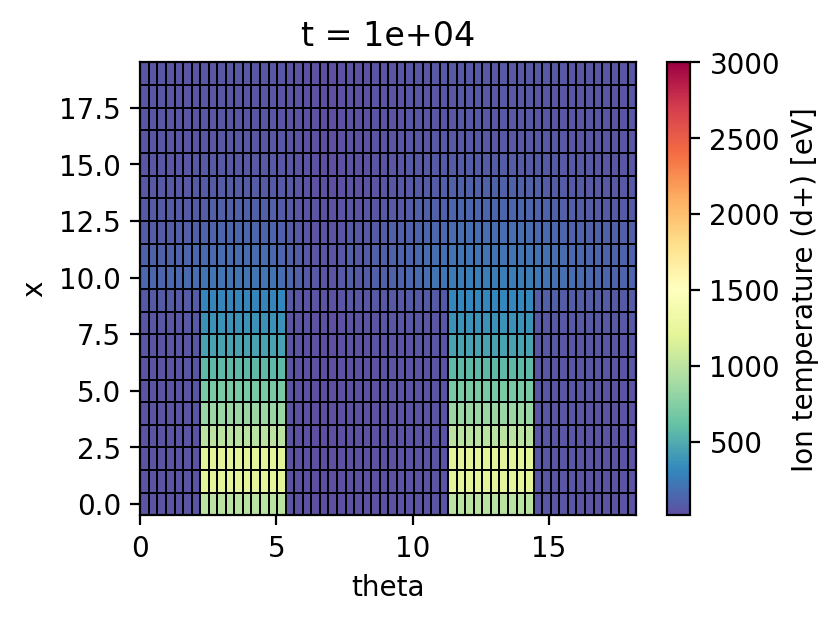

In [5]:
fig, ax = plt.subplots(figsize=(4,3),dpi = 200)
# self.ds["Pd+_src"].isel(t=-1).plot(ax = ax, cmap = "Spectral_r", color = "k", linewidth = 0.01, vmin = 0, vmax = None)
case.ds["Td+"].isel(t=-1).plot(ax = ax, cmap = "Spectral_r", color = "k", linewidth = 0.01, vmin = None, vmax = 3000)

(-0.9, -0.6)

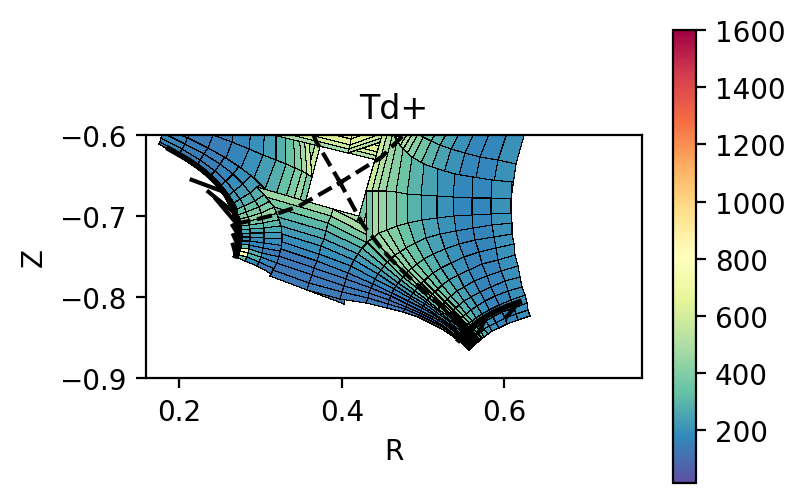

In [30]:
fig, ax = plt.subplots(figsize=(4,3),dpi = 200)
self.ds["Td+"].isel(t=-1).bout.pcolormesh(ax = ax, cmap = "Spectral_r", color = "k", linewidth = 0.01, vmin = None, vmax = 1600)
# ax.set_ylim(0.4, 0.88)
ax.set_ylim(-0.9, -0.6)